# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [2]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [3]:
X=torch.tensor([[1,2,1],
                [2,4,6],
                [2,-1,5],
                [0,1,-2]])
## 임의 생성 : torch.randn(4, 3)


Y=torch.tensor([[3,1,2],
                [5,0,-1],
                [1,2,3],
                [4,-4,0]])

# 행으로 병합 코드

torch.cat([X, Y], dim=1)

# 열로 병합 코드

torch.cat([X, Y], dim=0)

tensor([[ 1,  2,  1],
        [ 2,  4,  6],
        [ 2, -1,  5],
        [ 0,  1, -2],
        [ 3,  1,  2],
        [ 5,  0, -1],
        [ 1,  2,  3],
        [ 4, -4,  0]])

### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [4]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: matplotlib-inli

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.5109,  0.3823]) 
label: tensor([0.3921])


In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):

        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2823,  1.0005],
        [ 0.7898,  1.0447],
        [-1.5155,  0.6804],
        [ 0.7116,  0.3463],
        [ 1.5698,  0.2066],
        [ 0.5377,  0.6655],
        [ 0.9796,  0.1647],
        [-0.0867, -0.5991],
        [-0.8008, -1.9582],
        [-0.0911, -0.7307],
        [ 0.8452,  0.3507],
        [-0.7610, -0.2446],
        [ 0.4487,  0.2022],
        [-0.5488, -0.8114],
        [-0.1039,  1.1989],
        [-0.1617, -0.4060],
        [ 1.5053, -1.3446],
        [-0.8410, -0.5769],
        [-1.0942,  1.1533],
        [ 1.9622, -0.2648]]) 
 tensor([[ 3.1599],
        [ 6.3216],
        [-0.0684],
        [ 7.1209],
        [ 9.9126],
        [ 6.1062],
        [ 8.1881],
        [ 6.1514],
        [ 6.0396],
        [ 6.3156],
        [ 7.5144],
        [ 3.5914],
        [ 6.5402],
        [ 5.0842],
        [ 3.3972],
        [ 5.6098],
        [12.0370],
        [ 3.8510],
        [ 0.4801],
        [11.7827]])


In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([3])#원하는 실수를 넣어주세요

In [7]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            if param.grad is not None:
                param -= lr * param.grad / batch_size
                param.grad.zero_()


In [10]:
lr = 0.001
num_epochs = 30
net = linreg
loss = squared_loss

# List for cost graph
w1 = []
w2 = []
loss_w1 = []
loss_w2 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        # Append List for cost graph
        w1.append(w.tolist()[0])
        w2.append(w.tolist()[1])
        loss_w1.append(train_l[0].mean())
        loss_w2.append(train_l[1].mean())

epoch 1, loss 7.768799
epoch 2, loss 6.929151
epoch 3, loss 6.242201
epoch 4, loss 5.679436
epoch 5, loss 5.217946
epoch 6, loss 4.839975
epoch 7, loss 4.530451
epoch 8, loss 4.275952
epoch 9, loss 4.068118
epoch 10, loss 3.897628
epoch 11, loss 3.758115
epoch 12, loss 3.644144
epoch 13, loss 3.550631
epoch 14, loss 3.473824
epoch 15, loss 3.410655
epoch 16, loss 3.359129
epoch 17, loss 3.316825
epoch 18, loss 3.282321
epoch 19, loss 3.253918
epoch 20, loss 3.230563
epoch 21, loss 3.211386
epoch 22, loss 3.195811
epoch 23, loss 3.183035
epoch 24, loss 3.172548
epoch 25, loss 3.163943
epoch 26, loss 3.156888
epoch 27, loss 3.151081
epoch 28, loss 3.146373
epoch 29, loss 3.142441
epoch 30, loss 3.139244


In [11]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.1344, -0.0701], grad_fn=<SubBackward0>)
error in estimating b: tensor([2.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

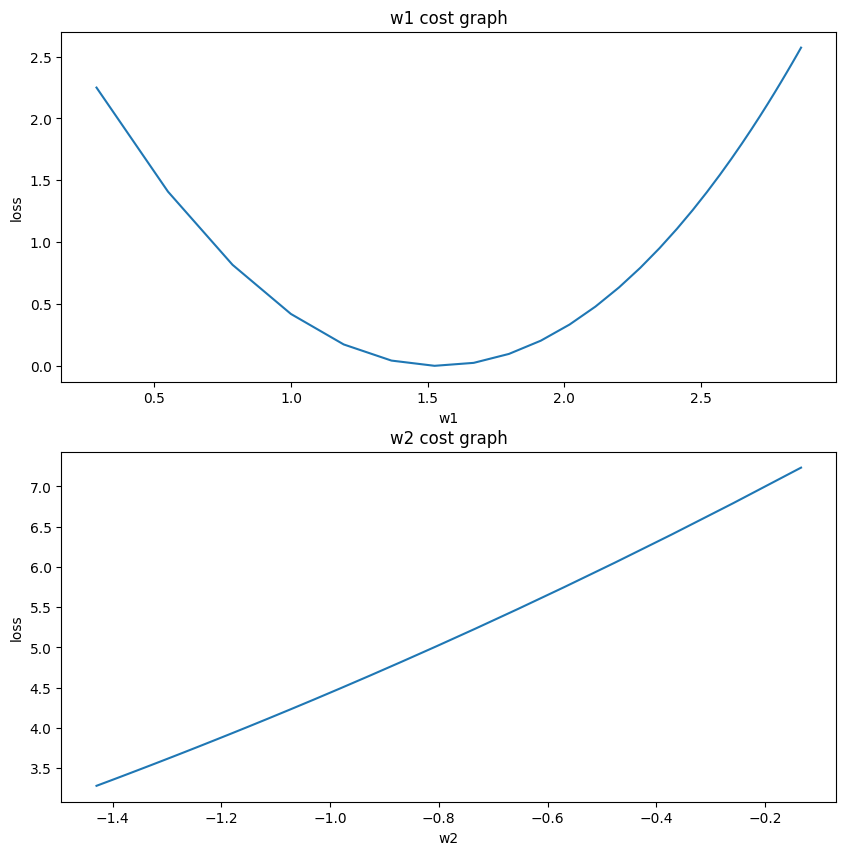

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(w1,loss_w1)
plt.title('w1 cost graph')
plt.xlabel('w1')
plt.ylabel('loss')

plt.subplot(2,1,2)
plt.plot(w2,loss_w2)
plt.title('w2 cost graph')
plt.xlabel('w2')
plt.ylabel('loss')

### Concise Implementation of Linear Regression
- API 사용해보기

In [14]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [15]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [16]:
next(iter(data_iter))

[tensor([[ 0.1108, -0.2577],
         [ 0.2055,  1.4431],
         [ 0.5991, -1.3985],
         [-0.0399,  0.5389],
         [-0.0847, -1.0443],
         [ 0.5608,  0.6663],
         [ 0.0091, -0.4130],
         [ 0.5929,  0.2321],
         [ 0.0352, -0.1437],
         [-0.0110,  0.3516],
         [ 0.2477,  0.4908],
         [ 0.7703, -0.2506],
         [ 0.4498, -1.5465],
         [-0.9796,  0.2271],
         [ 0.3968, -0.9496],
         [-0.9037,  1.5428],
         [-0.4792,  0.8853],
         [-1.3665, -2.0455],
         [-0.2528,  1.5430],
         [-1.9257,  0.0593]]),
 tensor([[ 6.2076],
         [ 3.9526],
         [ 9.3867],
         [ 4.5782],
         [ 6.8176],
         [ 6.1954],
         [ 6.1375],
         [ 6.9294],
         [ 5.8165],
         [ 4.9416],
         [ 5.5203],
         [ 8.1748],
         [ 9.1653],
         [ 2.2385],
         [ 8.1101],
         [ 0.4680],
         [ 2.7408],
         [ 4.4569],
         [ 2.4169],
         [-0.3707]])]

In [17]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [18]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [19]:
loss = nn.MSELoss()

In [20]:
trainer = torch.optim.SGD(net.parameters(),lr=0.01) ###api function으로 직접 설정

In [21]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.673180
epoch 2, loss 0.010825
epoch 3, loss 0.000276


In [23]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0056, -0.0015])
error in estimating b: tensor([0.0118])
